# Importing Dependencies

In [1]:
from models.modelsFDH import FDH
from models.modelsDEA import DEA
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt

from utils.is_efficient import is_efficient
from utils.datainput import xlsx2matrix 
from scipy.stats import norm


# from utils.li_test import li_test

# Defining functions

In [2]:
def stats(df):
    avg_eff = df['efficiency'].mean()
    min_eff = df['efficiency'].min()
    max_eff = df['efficiency'].max()
    std_dev_eff = df['efficiency'].std()
    num_eff = df['is_efficient'].sum()
    num_considered = len(df)

    result = {
        'avg': avg_eff,
        'min': min_eff,
        'max': max_eff,
        'std_dev': std_dev_eff,
        'num_eff': num_eff,
        'num_considered': num_considered
    }
    return result

def plot_comparison(model1, model2):
    df1, name1 = model1
    df2, name2 = model2
    
    stats1 = stats(df1)
    stats2 = stats(df2)
    
    eff1 = df1['efficiency']
    eff2 = df2['efficiency']
    
    ratio1 = stats1['num_eff'] / stats1['num_considered']
    ratio2 = stats2['num_eff'] / stats2['num_considered']
    
    print(f"{name1} - Efficiency ratio (num_eff / num_considered): {ratio1:.2f}")
    print(f"{name2} - Efficiency ratio (num_eff / num_considered): {ratio2:.2f}")
    
    plt.figure(figsize=(12, 6))

    sns.histplot(eff1, kde=False, color='blue', bins=15, stat='density', label=f'{name1} Efficiency', alpha=0.6)
    mean1, std_dev1 = eff1.mean(), eff1.std()
    x1 = np.linspace(mean1 - 3*std_dev1, mean1 + 3*std_dev1, 100)
    plt.plot(x1, norm.pdf(x1, mean1, std_dev1), color='blue', linestyle='--', label=f'{name1} Gaussian')

    sns.histplot(eff2, kde=False, color='green', bins=15, stat='density', label=f'{name2} Efficiency', alpha=0.6)
    mean2, std_dev2 = eff2.mean(), eff2.std()
    x2 = np.linspace(mean2 - 3*std_dev2, mean2 + 3*std_dev2, 100)
    plt.plot(x2, norm.pdf(x2, mean2, std_dev2), color='green', linestyle='--', label=f'{name2} Gaussian')

    plt.title(f"Efficiency Distribution Comparison Between {name1} and {name2}")
    plt.xlabel("Efficiency")
    plt.ylabel("Density")
    plt.legend()

    plt.show()



# initialization

In [3]:
# l, m = xlsx2matrix("./cleaned.xlsx", 
#                    ['K84', 'L84', 'M84', 'PK84', 'PL84', 'PM84'], 
#                    ["Y1Z84", "Y2Z84"])

In [4]:
# dea = DEA(l, m)
# fdh = FDH(l, m)

# FDH VRS (VS) BCC

In [5]:
# fdh.fdh_output_vrs()

In [6]:
import pandas as pd
scores = pd.read_csv('/Users/harshit/Downloads/scores.csv')

In [7]:
scores

,EAT_BCC_OUT,FDH_BCC_OUT
0,14.014,1.487
1,3.117,1.000
2,1.628,1.000
3,3.287,1.000
4,2.804,1.000
...,...,...
271,2.177,1.000
272,2.581,1.000
273,3.823,1.748
274,1.910,1.000


In [8]:
eatbcc = scores['EAT_BCC_OUT']
avg_eff = eatbcc.mean()
min_eff = eatbcc.min()
max_eff = eatbcc.max()
std_dev_eff = eatbcc.std()
num_eff = (eatbcc==1).sum()
num_considered = len(eatbcc)

resulteat = {
    'avg': avg_eff,
    'min': min_eff,
    'max': max_eff,
    'std_dev': std_dev_eff,
    'num_eff': num_eff,
    'num_considered': num_considered
}

resulteat


{'avg': np.float64(4.327181159420291),
 'min': np.float64(1.0),
 'max': np.float64(31.17),
 'std_dev': np.float64(4.267347469476062),
 'num_eff': np.int64(10),
 'num_considered': 276}

In [9]:
eatbcc = scores['FDH_BCC_OUT']
avg_eff = eatbcc.mean()
min_eff = eatbcc.min()
max_eff = eatbcc.max()
std_dev_eff = eatbcc.std()
num_eff = (eatbcc==1).sum()
num_considered = len(eatbcc)

resultfdh = {
    'avg': avg_eff,
    'min': min_eff,
    'max': max_eff,
    'std_dev': std_dev_eff,
    'num_eff': num_eff,
    'num_considered': num_considered
}

resultfdh


{'avg': np.float64(1.3163369565217393),
 'min': np.float64(1.0),
 'max': np.float64(7.106),
 'std_dev': np.float64(0.8347172927253297),
 'num_eff': np.int64(189),
 'num_considered': 276}

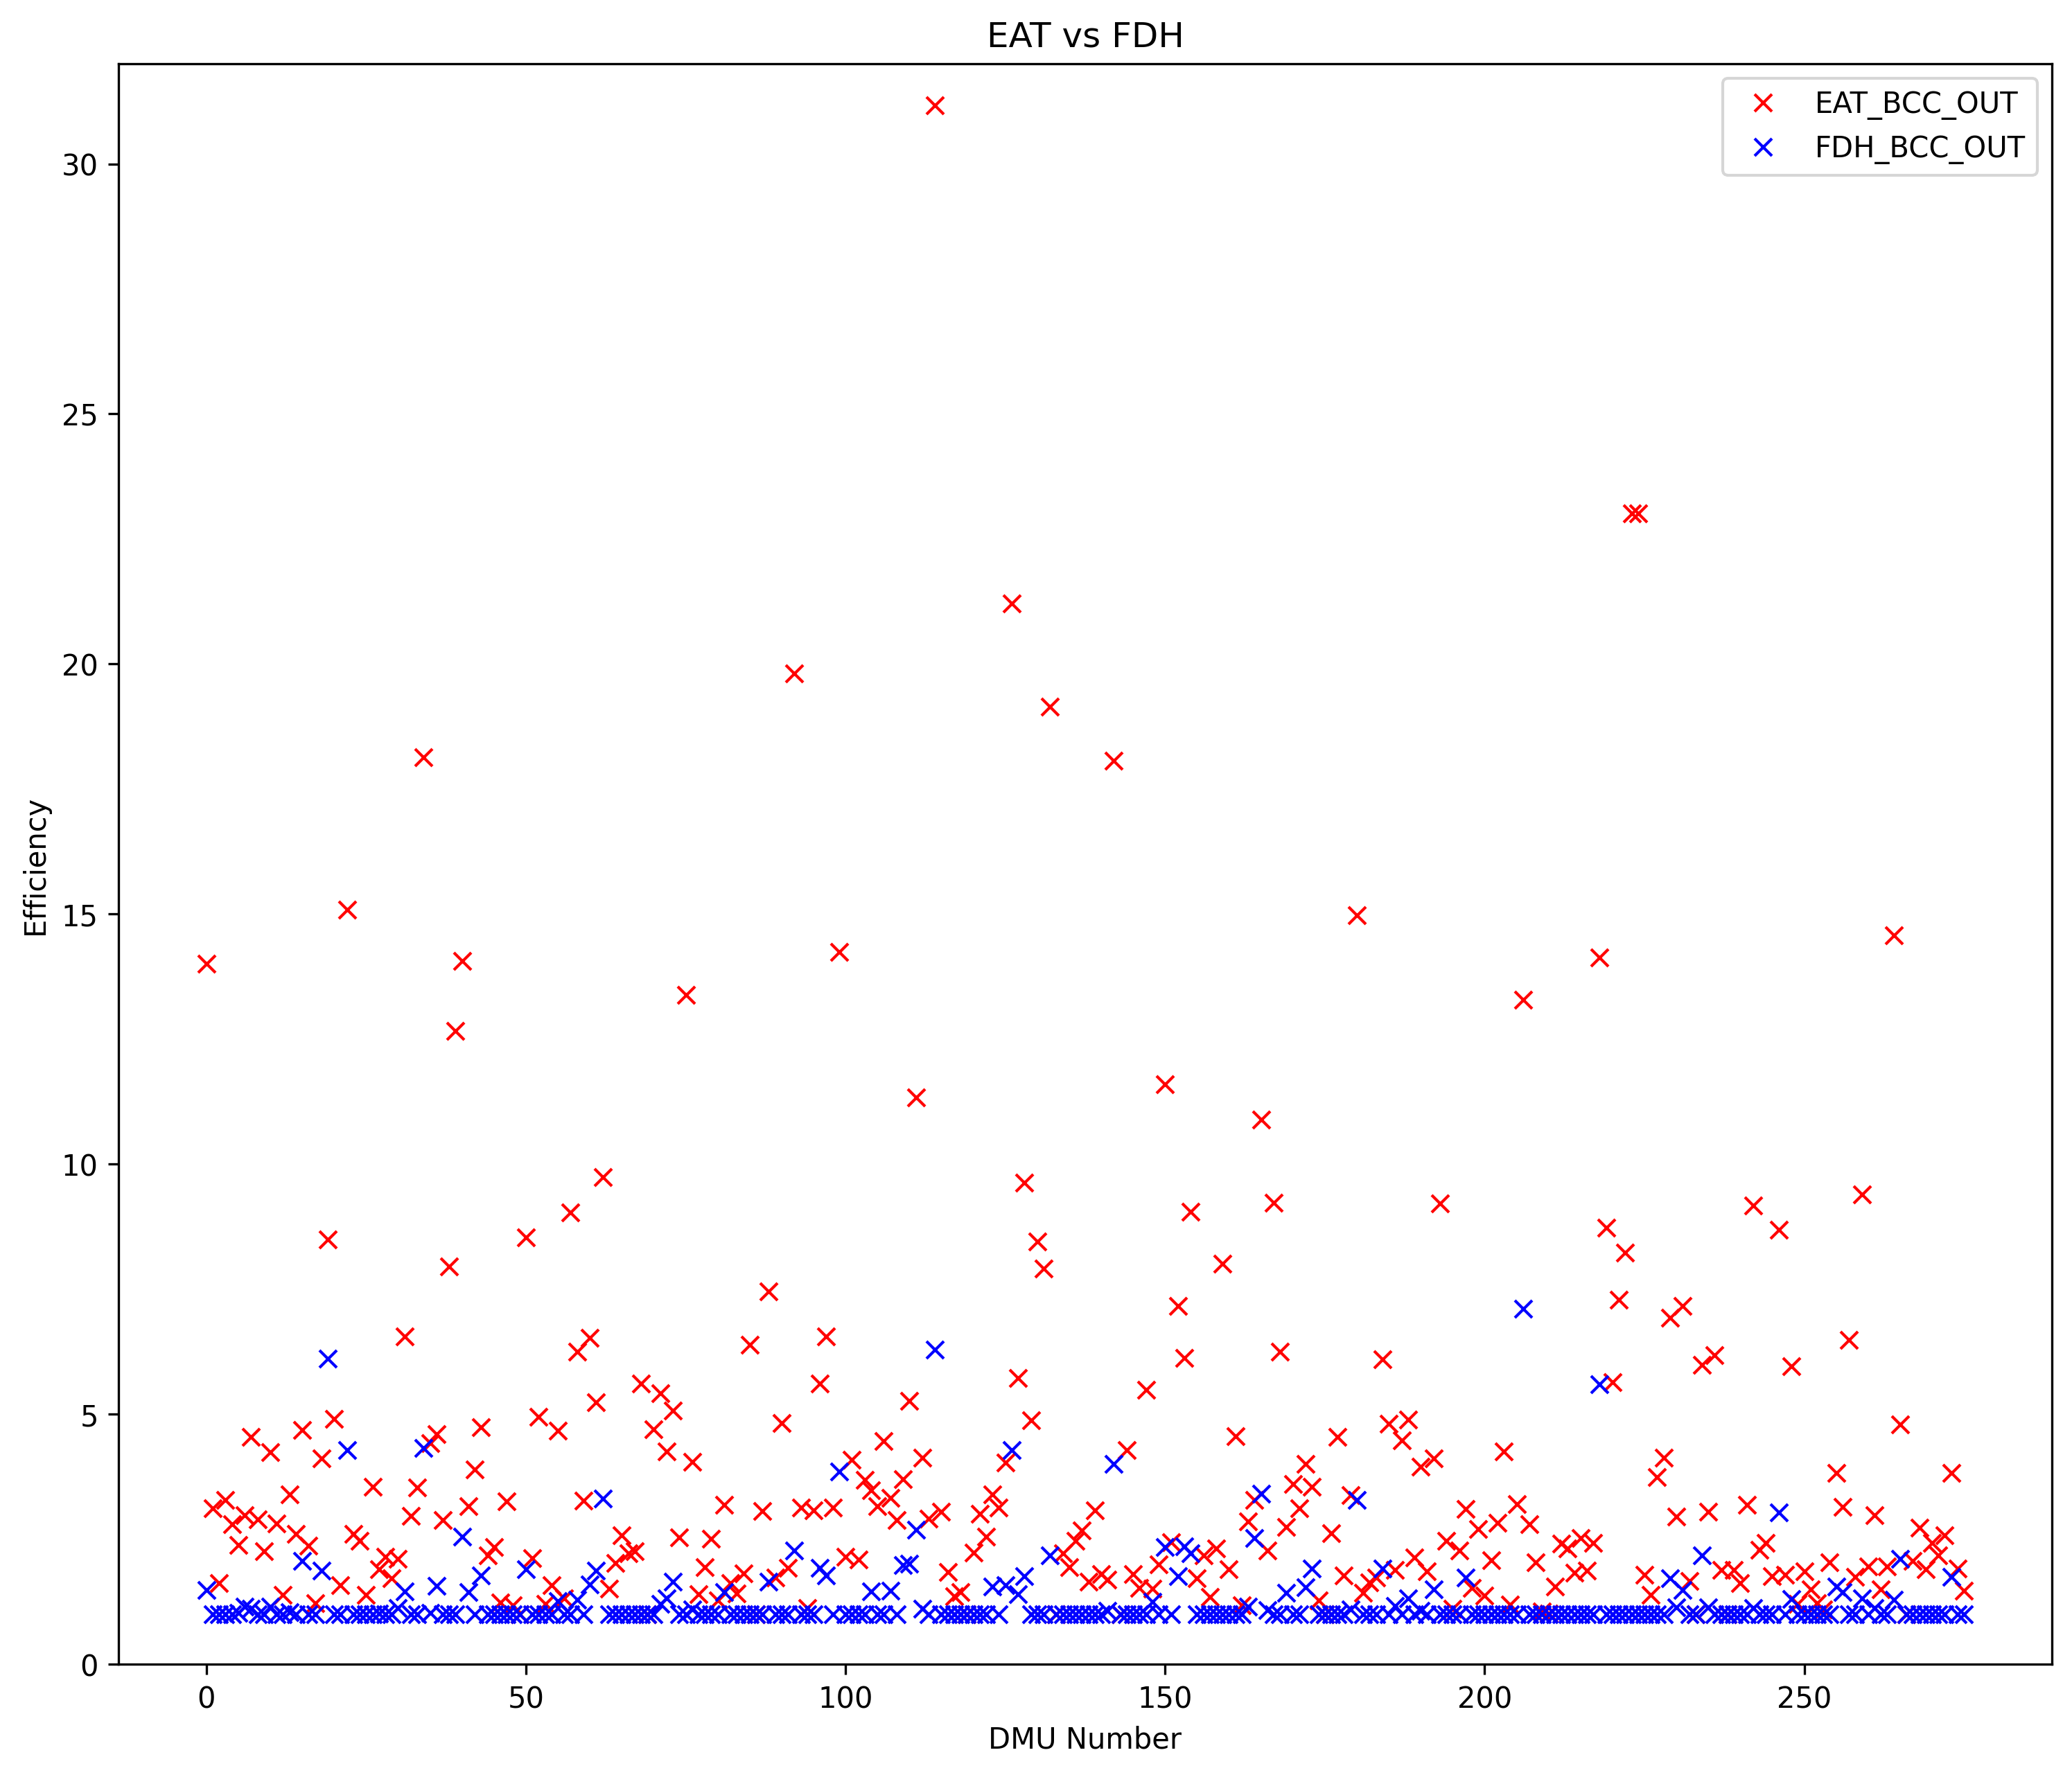

In [10]:
plt.figure(figsize=(12, 10), dpi=300)
# df1 = fdh.fdh_input_vrs()
# df2 = dea.bcc_input()
scores['EAT_BCC_OUT']
plt.plot(scores.index, scores['EAT_BCC_OUT'], marker='x', color='r', linestyle='', label='EAT_BCC_OUT')  # Blue crosses
plt.plot(scores.index, scores['FDH_BCC_OUT'], marker='x', color='b', linestyle='', label='FDH_BCC_OUT')  # Red crossesplt.ylim(0, 1.1)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels)

plt.ylim(0, 32)
plt.xlabel('DMU Number')
plt.ylabel('Efficiency')
plt.title('EAT vs FDH')
plt.show()


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

def stats(df, eff_col, bool_col=None):
    s = df[eff_col]
    result = {
        'avg':     s.mean(),
        'min':     s.min(),
        'max':     s.max(),
        'std_dev': s.std(),
        'count':   len(s)
    }
    if bool_col:
        num_eff = df[bool_col].sum()
        result.update({
            'num_eff':       num_eff,
            'eff_ratio':     num_eff / result['count']
        })
    return result

def plot_comparison(df, 
                    eff_col1, eff_col2, 
                    name1='Model 1', name2='Model 2', 
                    bool_col1=None, bool_col2=None,
                    bins=15):
    # compute stats
    st1 = stats(df, eff_col1, bool_col1)
    st2 = stats(df, eff_col2, bool_col2)

    # print efficiency ratios if available
    if 'eff_ratio' in st1 and 'eff_ratio' in st2:
        print(f"{name1} efficiency ratio: {st1['eff_ratio']:.2f}")
        print(f"{name2} efficiency ratio: {st2['eff_ratio']:.2f}")

    # extract series
    e1, e2 = df[eff_col1], df[eff_col2]

    plt.figure(figsize=(10, 5), dpi=300)
    # hist + Gaussian for model 1
    sns.histplot(e1, bins=bins, stat='density', alpha=0.6, label=name1)
    x1 = np.linspace(st1['avg']-3*st1['std_dev'], st1['avg']+3*st1['std_dev'], 100)
    plt.plot(x1, norm.pdf(x1, st1['avg'], st1['std_dev']), 
             linestyle='--', label=f"{name1} Gaussian")

    # hist + Gaussian for model 2
    sns.histplot(e2, bins=bins, stat='density', alpha=0.6, label=name2)
    x2 = np.linspace(st2['avg']-3*st2['std_dev'], st2['avg']+3*st2['std_dev'], 100)
    plt.plot(x2, norm.pdf(x2, st2['avg'], st2['std_dev']), 
             linestyle='--', label=f"{name2} Gaussian")

    plt.title(f"Efficiency Distribution: {name1} vs {name2}")
    plt.xlabel("Efficiency")
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [12]:
scores

,EAT_BCC_OUT,FDH_BCC_OUT
0,14.014,1.487
1,3.117,1.000
2,1.628,1.000
3,3.287,1.000
4,2.804,1.000
...,...,...
271,2.177,1.000
272,2.581,1.000
273,3.823,1.748
274,1.910,1.000


In [13]:
scores['BoolEAT'] = (scores['EAT_BCC_OUT']==1)
scores['BoolFDH'] = (scores['FDH_BCC_OUT']==1)

EAT efficiency ratio: 0.04
FDH efficiency ratio: 0.68


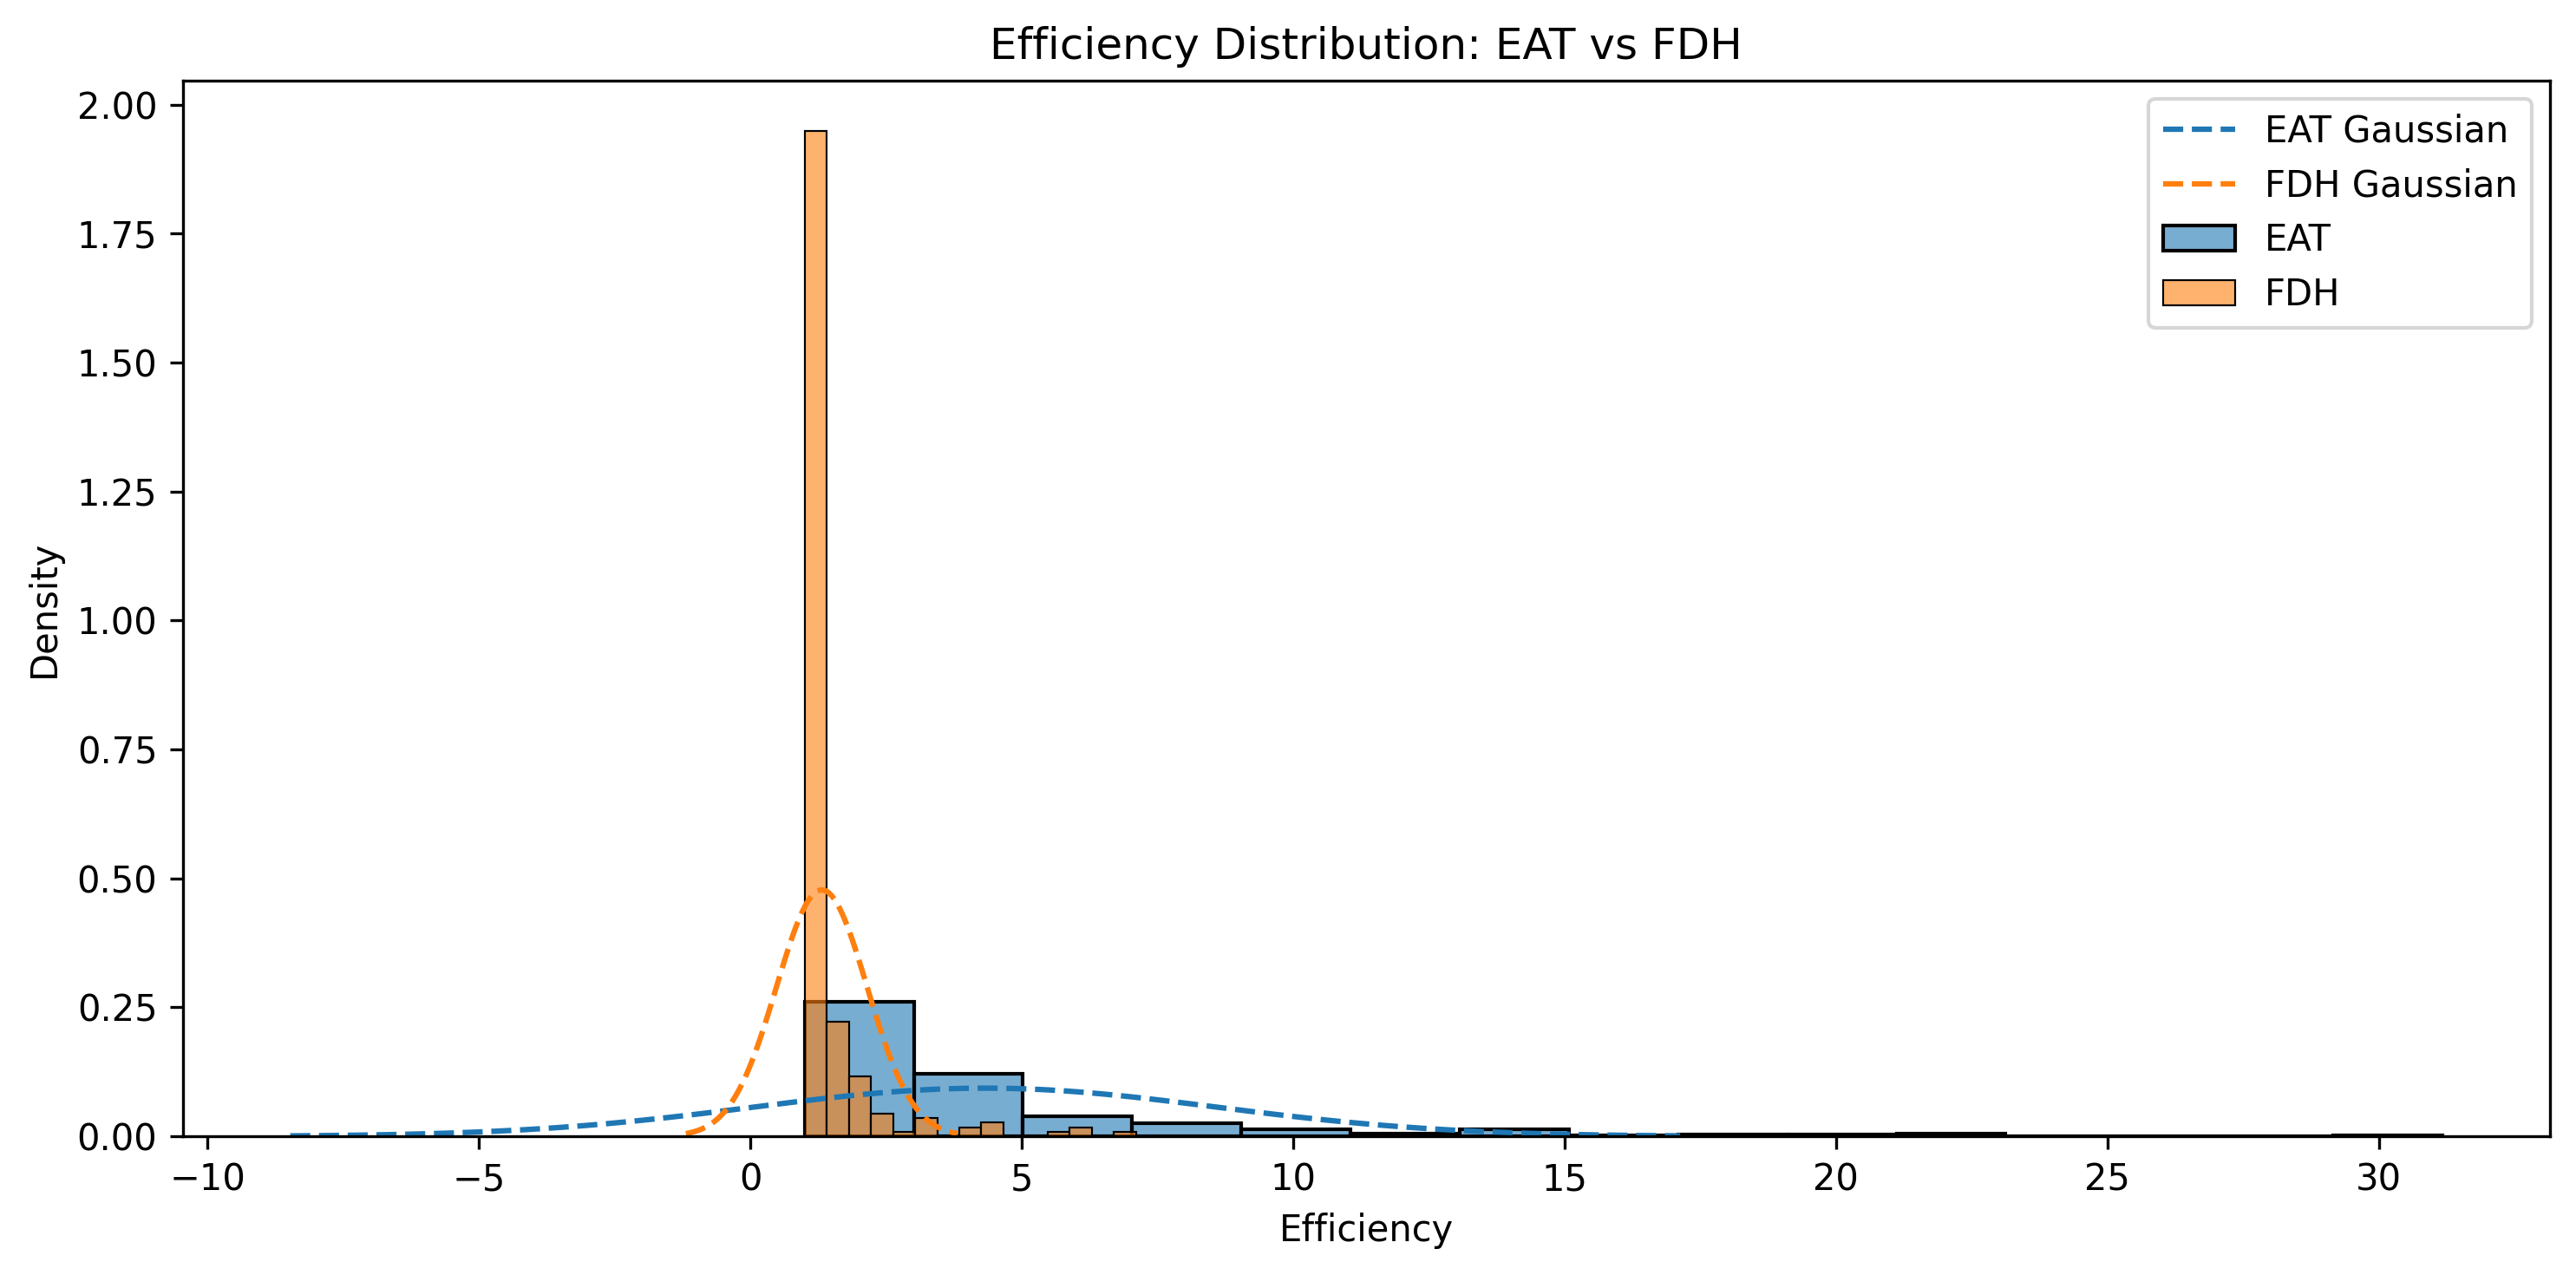

In [14]:
# assuming your DataFrame has columns 'eff_A', 'eff_B'
# and Boolean flags 'is_eff_A', 'is_eff_B'
plot_comparison(
    scores,
    eff_col1='EAT_BCC_OUT', bool_col1='BoolEAT', name1='EAT',
    eff_col2='FDH_BCC_OUT', bool_col2='BoolFDH', name2='FDH'
)


In [16]:
189/276

0.6847826086956522